# **Teoría de las Máquinas de Vectores de Soporte para Regresión (SVR)**

Prof. Marcos Alania

## **1. Introducción**
Las Máquinas de Vectores de Soporte (Support Vector Machines, SVM) son un conjunto de algoritmos de aprendizaje supervisado, principalmente conocidos por su aplicación en clasificación. Sin embargo, también se pueden utilizar para resolver problemas de regresión mediante una técnica conocida como **Support Vector Regression (SVR)**. A diferencia de las SVM para clasificación, que buscan maximizar el margen entre clases, en SVR el objetivo es ajustar una función que se aproxime lo mejor posible a los datos de salida, manteniendo una tolerancia de error dentro de un margen aceptable.

## **2. Fundamentos Teóricos del SVR**
### **2.1. Concepto General**
SVR tiene como objetivo predecir un valor continuo en lugar de una etiqueta de clase. En lugar de simplemente minimizar el error entre los valores predichos y los valores reales, SVR busca ajustar una función que tenga la menor desviación posible dentro de un margen definido, llamado el **margen epsilon ($\epsilon$)**. Este margen ε permite que algunos puntos de datos estén fuera de la predicción exacta, siempre y cuando el error esté dentro de un rango permitido.

### **2.2. Función Objetivo**
La función de regresión que se ajusta es generalmente una función lineal del tipo:
\begin{equation}
    f(x) = w \cdot x + b
\end{equation}

Donde:

*  $w$ es el vector de pesos,
*  $x$ es el vector de características,
*  $b$ es un término de sesgo o intercepto.

El objetivo del SVR es encontrar la función $f(x)$ tal que la predicción esté lo más cerca posible de los valores reales, con una tolerancia $\epsilon$, minimizando a la vez la complejidad del modelo (es decir, manteniendo $w$ pequeño). La función de costo utilizada en SVR es una variación de la función de pérdida tradicional, llamada **epsilon-insensitive loss function**:

\begin{equation}
L_{\epsilon} (y, f(x)) = \max(0, |y - f(x)| - \epsilon)
\end{equation}

Esta función define que si el error está dentro del margen $\epsilon$, no hay penalización. Si el error es mayor que $\epsilon$, se penaliza en proporción a la cantidad de error adicional.

### **2.3. Optimización**
El problema de SVR se puede formular como un problema de optimización cuadrática:

\begin{equation}
\min_{w, b, \xi, \xi^*} \left( \frac{1}{2} \|w\|^2 + C \sum_{i=1}^n (\xi_i + \xi_i^*) \right)
\end{equation}

Sujeto a las restricciones:
\begin{equation}
\begin{aligned}
y_i - (w \cdot x_i + b) &\leq \epsilon + \xi_i \\
-(w \cdot x_i + b) + y_i &\leq \epsilon + \xi_i^* \\
\xi_i, \xi_i^* &\geq 0
\end{aligned}
\end{equation}

Aquí:
*  $\xi$ y $\xi^*$ son las variables de holgura que permiten que algunos puntos estén fuera del margen $\epsilon$,
*  $C$ es un parámetro de regularización que controla el trade-off entre minimizar el error y la magnitud de $w$.

### **2.4. Aplicación de Kernels**
En la mayoría de los casos, la relación entre las variables predictoras $x$ y el valor objetivo $y$ no es lineal. Para manejar esto, el SVR utiliza el **truco del kernel**, que transforma los datos de entrada a un espacio de características de mayor dimensión donde un problema no lineal en el espacio original se puede resolver como un problema lineal.

Los kernels comunes incluyen:
*  Kernel lineal: $K(x, x') = x \cdot x'$
*  Kernel polinómico: $K(x, x') = (x \cdot x' + 1)^d$
*  Kernel RBF (Radial Basis Function): $K(x, x') = \exp(-\gamma \|x - x'\|^2)$

## **3. Ejemplo Práctico de SVR**
### **3.1. Descripción del Problema**
Supongamos que tenemos un conjunto de datos que relaciona la temperatura (en grados Celsius) con la demanda de electricidad (en kWh) de una ciudad. Queremos construir un modelo de SVR para predecir la demanda de electricidad dado un valor de temperatura.

### **3.2. Conjunto de Datos de Ejemplo**
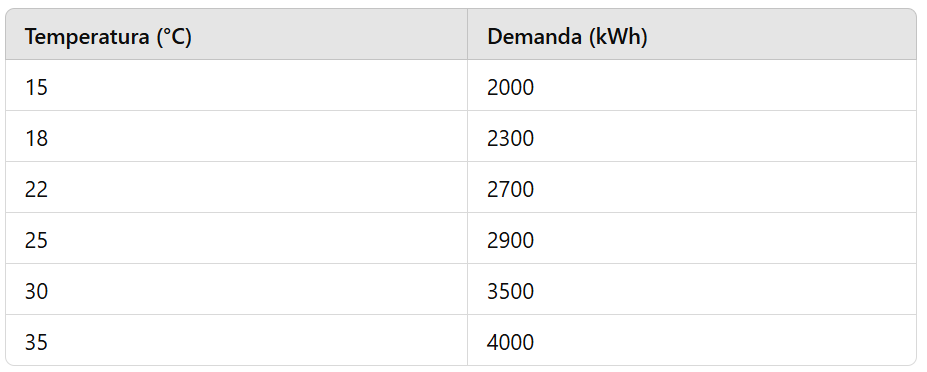

### **3.3. Implementación del SVR**
Usando la biblioteca scikit-learn en Python, podemos implementar este modelo:

In [ ]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# Datos de entrenamiento
temperaturas = np.array([15, 18, 22, 25, 30, 35]).reshape(-1, 1)
demanda = np.array([2000, 2300, 2700, 2900, 3500, 4000])

# Crear el modelo SVR con kernel RBF
svr_rbf = SVR(kernel='rbf', C=1000, epsilon=0.1)

# Ajustar el modelo
svr_rbf.fit(temperaturas, demanda)

# Predicciones
temp_prueba = np.linspace(10, 40, 100).reshape(-1, 1)
demanda_predicha = svr_rbf.predict(temp_prueba)

# Visualización
plt.scatter(temperaturas, demanda, color='red', label='Datos originales')
plt.plot(temp_prueba, demanda_predicha, color='blue', label='SVR predicción')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Demanda (kWh)')
plt.title('Predicción de demanda de electricidad utilizando SVR')
plt.legend()
plt.show()


### **3.4. Explicación del Código**
1.  **Entrenamiento**: Se crean dos arrays: temperaturas y demanda, que representan nuestros datos de entrada y salida, respectivamente.
2.  **Modelo SVR**: Se crea un modelo SVR con un kernel RBF (base radial), que es un kernel común en problemas de regresión. El parámetro $C$ controla la regularización, mientras que $ε$ establece el margen de error permisible.
3.  **Ajuste y Predicción**: El modelo se ajusta a los datos y luego se utiliza para predecir la demanda de electricidad para un rango de temperaturas entre 10°C y 40°C.
4.  **Visualización**: Los resultados se visualizan mediante un gráfico, donde los puntos rojos representan los datos originales y la línea azul muestra la predicción del SVR.

### **3.5. Interpretación de Resultados**
El modelo SVR ajusta una curva suave que intenta predecir la demanda de electricidad en función de la temperatura. Observamos que el SVR no trata de ajustar exactamente cada punto de datos, sino que encuentra una solución balanceada dentro de un margen de error aceptable. Esto es útil cuando los datos contienen ruido o variaciones no sistemáticas.

## **4. Ventajas y Desventajas de SVR**
### **4.1. Ventajas**
*  **Robustez al Ruido**: La función de pérdida insensible a ε permite que el modelo ignore pequeñas desviaciones, lo que lo hace robusto a datos ruidosos.

*  **Flexibilidad**: Mediante el uso de kernels, el SVR puede modelar relaciones no lineales.

*  **Regularización**: El parámetro $C$ ayuda a evitar el sobreajuste, controlando el equilibrio entre complejidad del modelo y precisión en los datos de entrenamiento.

### **4.2. Desventajas**
*  **Computacionalmente Costoso**: SVR puede ser más lento que otros métodos de regresión cuando el tamaño del conjunto de datos es grande.

*  **Sensibilidad a la Elección de Parámetros**: El rendimiento del SVR depende mucho de la selección de los parámetros $C$, ε y del kernel, lo que puede requerir una optimización cuidadosa.

## **5. Conclusión**
Las Máquinas de Vectores de Soporte para Regresión (SVR) son una herramienta poderosa para la predicción de valores continuos, especialmente en situaciones donde los datos son ruidosos o las relaciones no son completamente lineales. Aunque el SVR puede requerir una cuidadosa selección de parámetros, su flexibilidad y capacidad para generalizar bien lo convierten en una opción valiosa en una amplia gama de aplicaciones de regresión.